In [24]:
import ccxt
import pandas as pd

# 初始化交易所
# 初始化 Binance 交易所，配置代理和顶级域名
exchange = ccxt.binance({
    'httpsProxy': 'http://127.0.0.1:7890',  # 设置代理
    'timeout': 30000,  # 请求超时时间（可选）
    'tld': 'us',  # Binance US 域名
})

In [25]:
# 定义获取历史数据的函数
def fetch_data(symbol, timeframe, start, end, limit=500):
    since = exchange.parse8601(start)  # 转换起始时间
    all_ohlcv = []

    while True:
        # 获取数据
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=since, limit=limit)

        if not ohlcv:
            break

        all_ohlcv.extend(ohlcv)

        # 更新 since 时间，获取下一个时间段的数据
        since = ohlcv[-1][0] + 1  # 使用最后一条数据的时间戳，避免重复

        # 输出获取的数据条数
        print(f"Fetched {len(ohlcv)} records, total: {len(all_ohlcv)}")

        # 如果返回的数据少于限制，说明已经到达末尾
        if len(ohlcv) < limit:
            break

    # 将数据转换为 DataFrame
    df = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # 过滤数据到指定结束日期
    end_date = pd.to_datetime(end)
    df = df[df.index <= end_date]

    return df

In [38]:
# 获取 SOL/USDT 和 JUP/USDT 的数据
symbol1 = 'SOL/USDT'
symbol2 = 'JUP/USDT'
timeframe = '1h'  # 数据间隔
start = '2024-02-01 00:00:00'
end = '2024-09-11 00:00:00'

# 下载数据
data1 = fetch_data(symbol1, timeframe, start, end)
data2 = fetch_data(symbol2, timeframe, start, end)
print(data1)
# 保存为 CSV 文件
data1.to_csv('SOL_USDT_data.csv')
data2.to_csv('JUP_USDT_data.csv')


Fetched 500 records, total: 500
Fetched 500 records, total: 1000
Fetched 500 records, total: 1500
Fetched 500 records, total: 2000
Fetched 500 records, total: 2500
Fetched 500 records, total: 3000
Fetched 500 records, total: 3500
Fetched 500 records, total: 4000
Fetched 500 records, total: 4500
Fetched 500 records, total: 5000
Fetched 500 records, total: 5500
Fetched 500 records, total: 6000
Fetched 500 records, total: 6500
Fetched 500 records, total: 7000
Fetched 500 records, total: 7500
Fetched 500 records, total: 8000
Fetched 500 records, total: 8500
Fetched 54 records, total: 8554
Fetched 500 records, total: 500
Fetched 500 records, total: 1000
Fetched 500 records, total: 1500
Fetched 500 records, total: 2000
Fetched 500 records, total: 2500
Fetched 500 records, total: 3000
Fetched 500 records, total: 3500
Fetched 500 records, total: 4000
Fetched 500 records, total: 4500
Fetched 500 records, total: 5000
Fetched 500 records, total: 5500
Fetched 500 records, total: 6000
Fetched 500 r

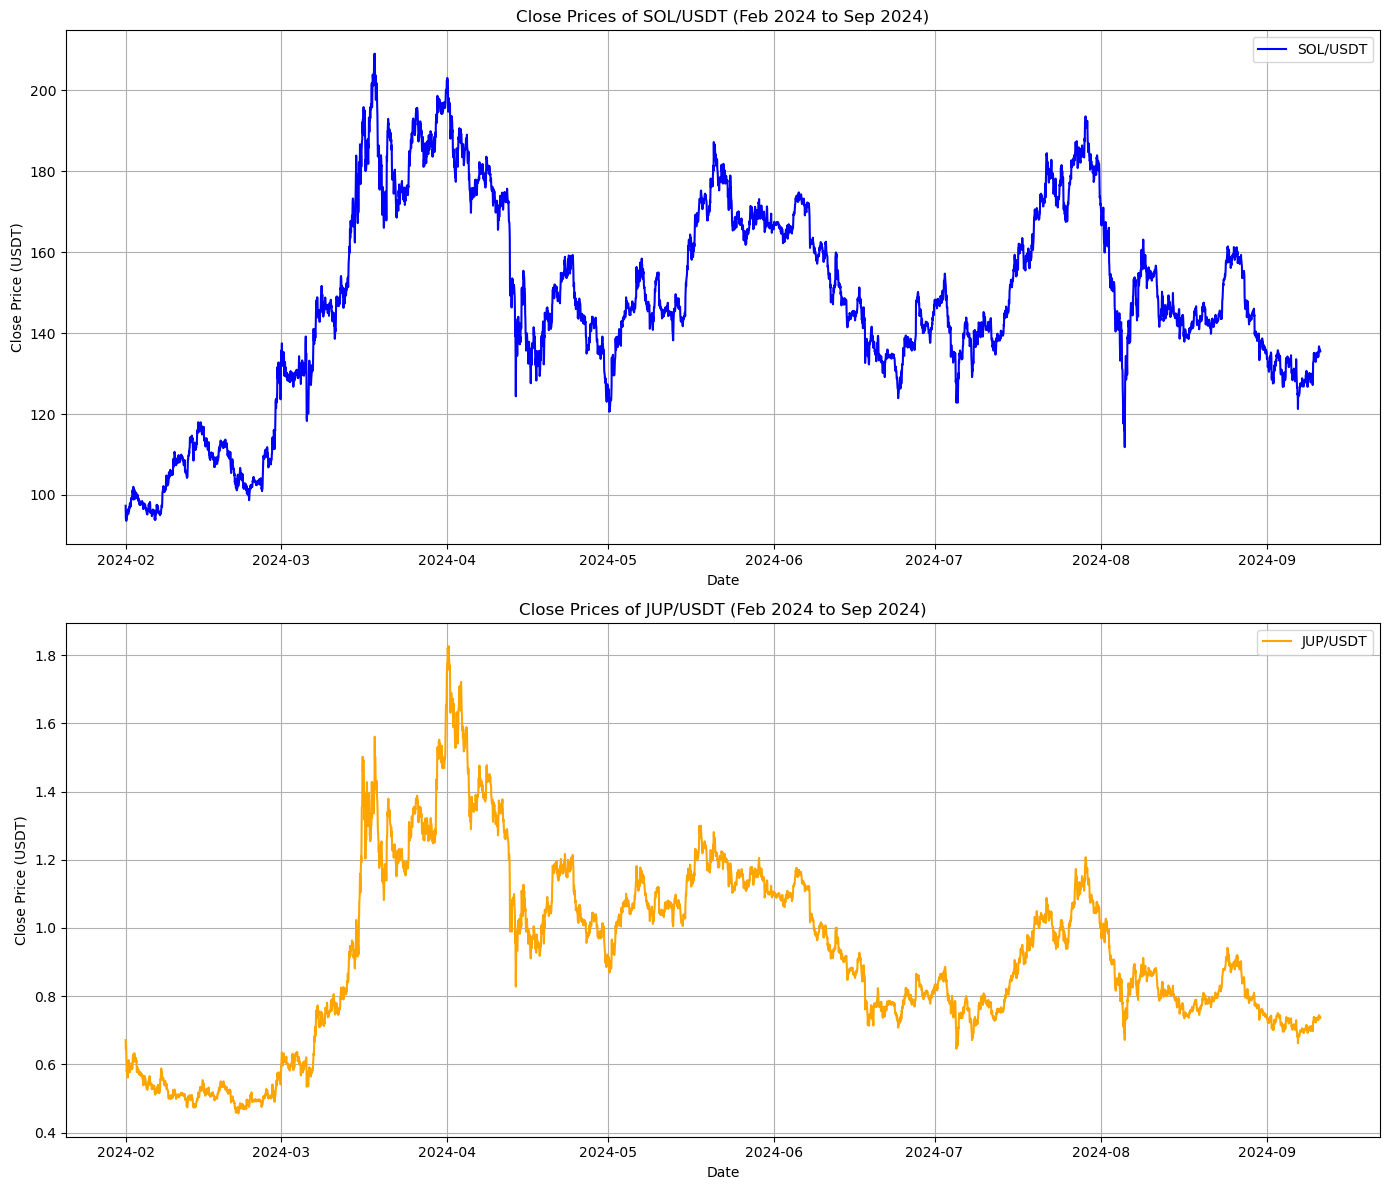

In [39]:
import matplotlib.pyplot as plt

# 创建两个子图
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 绘制第一个交易对的子图
axes[0].plot(data1['close'], label='SOL/USDT', color='blue')
axes[0].set_title('Close Prices of SOL/USDT (Feb 2024 to Sep 2024)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price (USDT)')
axes[0].legend()
axes[0].grid(True)

# 绘制第二个交易对的子图
axes[1].plot(data2['close'], label='JUP/USDT', color='orange')
axes[1].set_title('Close Prices of JUP/USDT (Feb 2024 to Sep 2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price (USDT)')
axes[1].legend()
axes[1].grid(True)

# 调整布局并显示图像
plt.tight_layout()
plt.show()

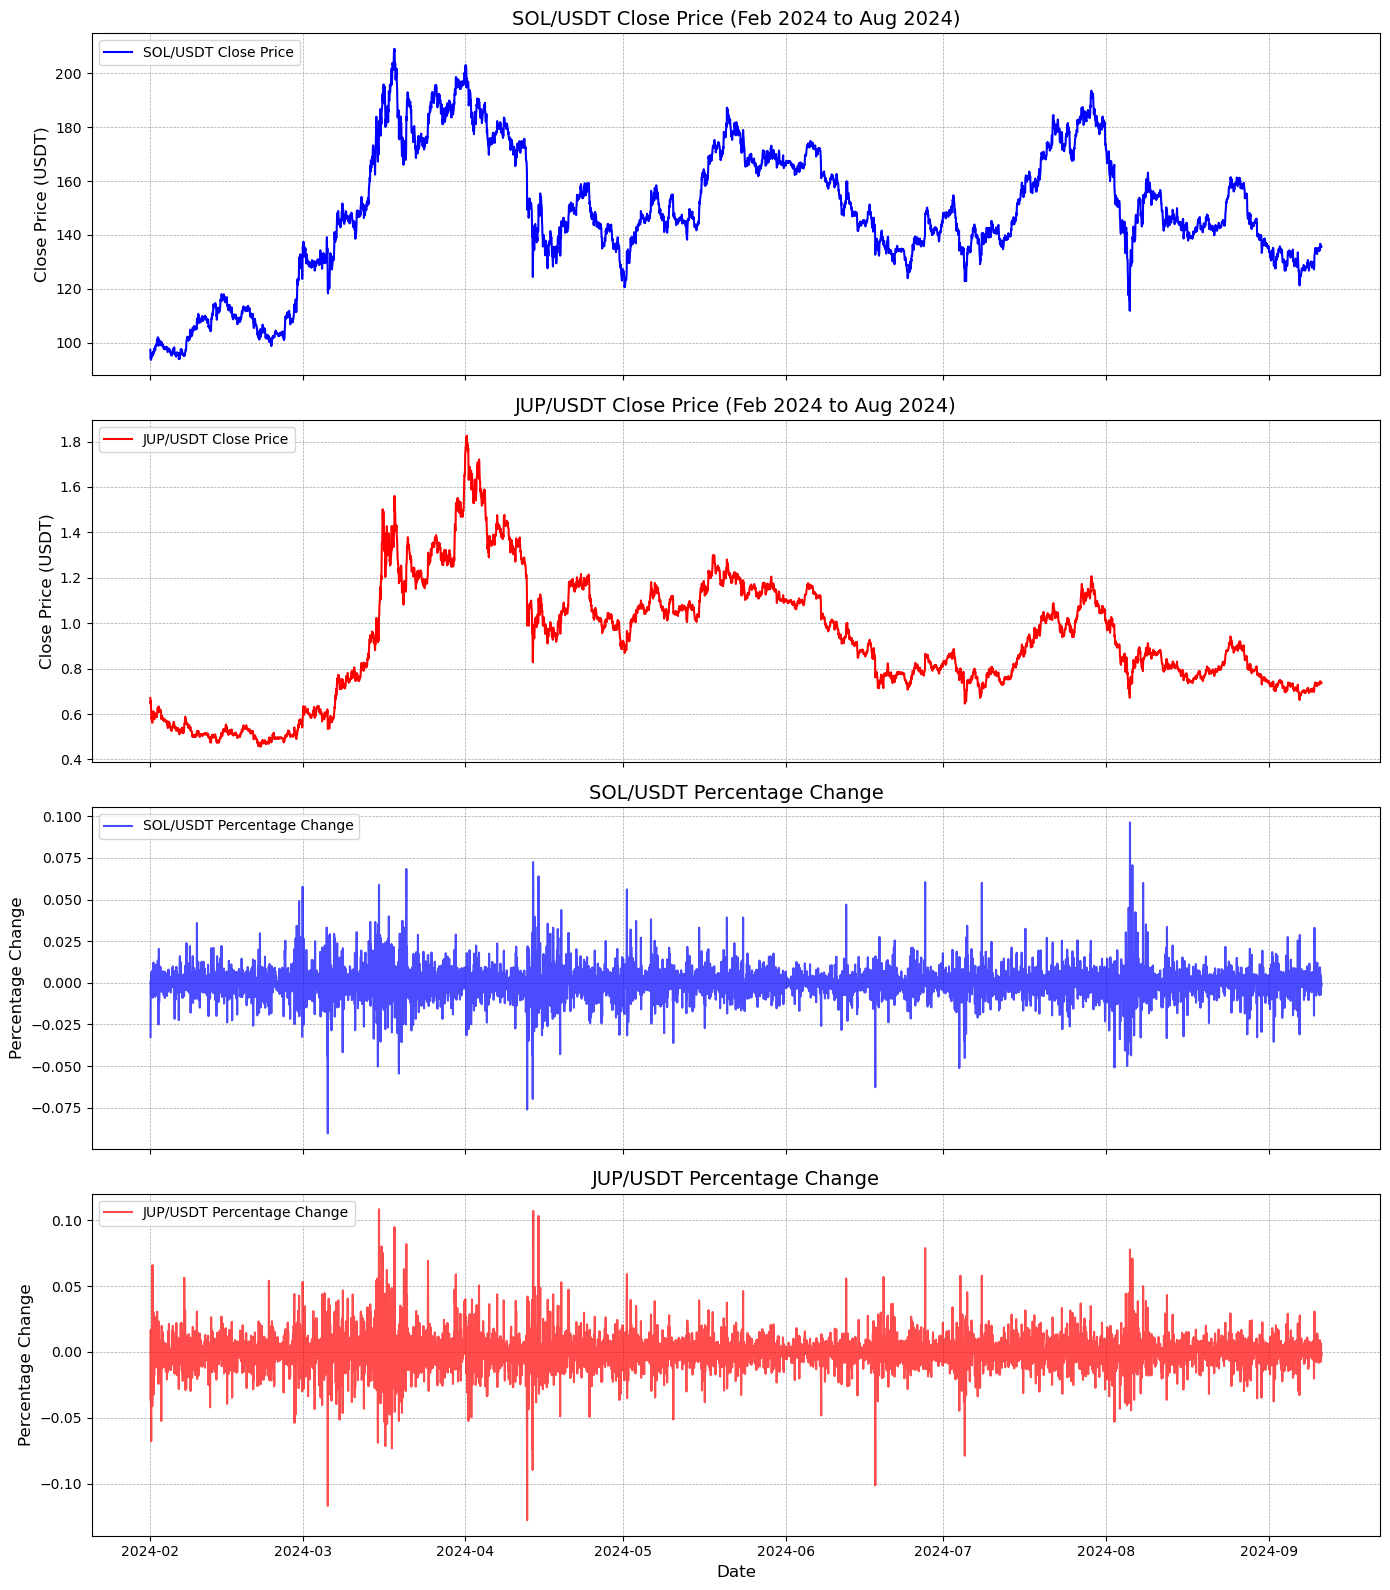

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# 从 CSV 文件读取数据
data1 = pd.read_csv('SOL_USDT_data.csv', index_col='timestamp', parse_dates=True)
data2 = pd.read_csv('JUP_USDT_data.csv', index_col='timestamp', parse_dates=True)

# 计算百分比变化
data1['pct_change'] = data1['close'].pct_change()
data2['pct_change'] = data2['close'].pct_change()

# 创建四个子图
fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

# 绘制 SOL/USDT 的收盘价
axes[0].plot(data1.index, data1['close'], label='SOL/USDT Close Price', color='blue', linewidth=1.5)
axes[0].set_title('SOL/USDT Close Price (Feb 2024 to Aug 2024)', fontsize=14)
axes[0].set_ylabel('Close Price (USDT)', fontsize=12)
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 绘制 JUP/USDT 的收盘价
axes[1].plot(data2.index, data2['close'], label='JUP/USDT Close Price', color='red', linewidth=1.5)
axes[1].set_title('JUP/USDT Close Price (Feb 2024 to Aug 2024)', fontsize=14)
axes[1].set_ylabel('Close Price (USDT)', fontsize=12)
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 绘制 SOL/USDT 的百分比变化
axes[2].plot(data1.index, data1['pct_change'], label='SOL/USDT Percentage Change', color='blue', alpha=0.7)
axes[2].set_title('SOL/USDT Percentage Change', fontsize=14)
axes[2].set_ylabel('Percentage Change', fontsize=12)
axes[2].legend(loc='upper left', fontsize=10)
axes[2].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 绘制 JUP/USDT 的百分比变化
axes[3].plot(data2.index, data2['pct_change'], label='JUP/USDT Percentage Change', color='red', alpha=0.7)
axes[3].set_title('JUP/USDT Percentage Change', fontsize=14)
axes[3].set_xlabel('Date', fontsize=12)
axes[3].set_ylabel('Percentage Change', fontsize=12)
axes[3].legend(loc='upper left', fontsize=10)
axes[3].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 调整布局并显示图像
plt.tight_layout()
plt.show()


Average Volatility of SOL/USDT: 0.009810
Average Volatility of JUP/USDT: 0.013386


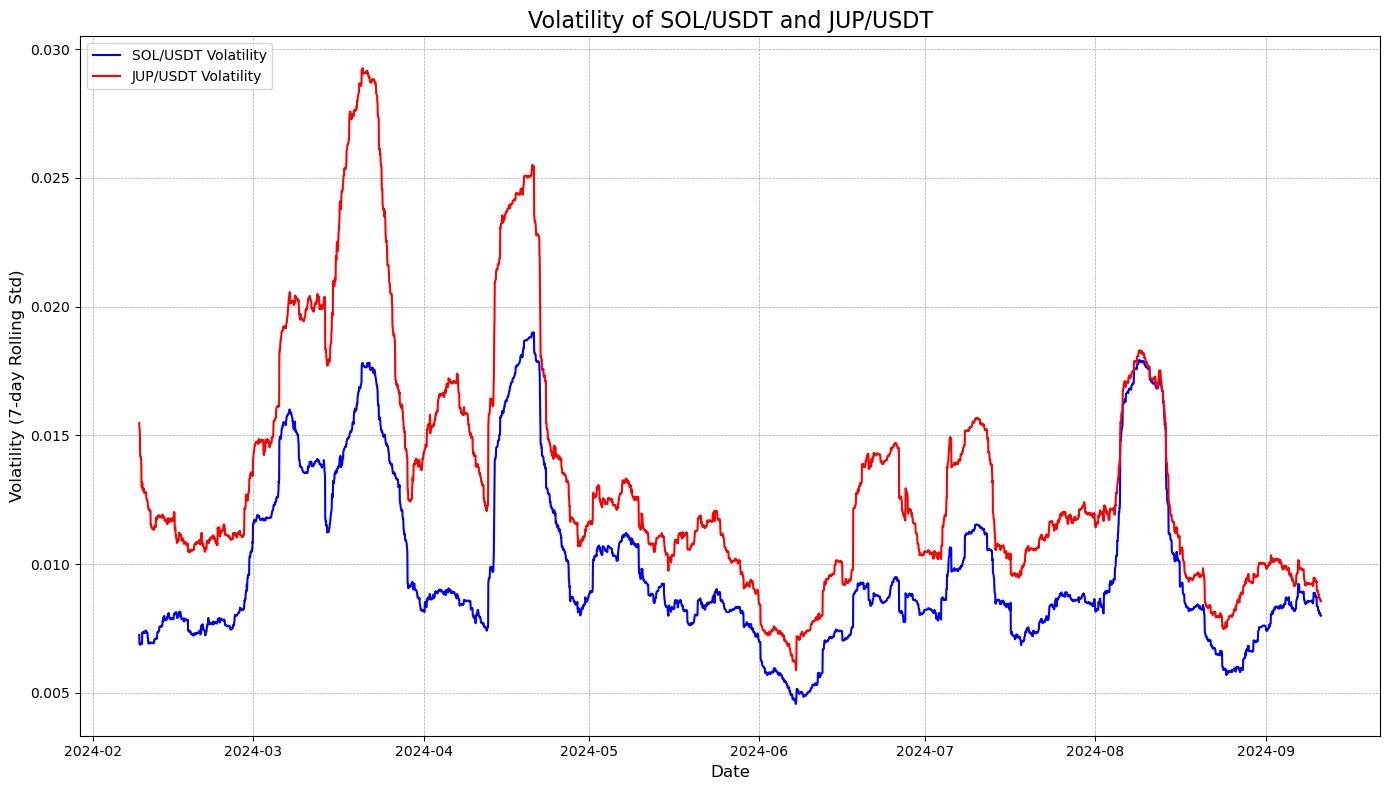

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 从 CSV 文件读取数据
data1 = pd.read_csv('SOL_USDT_data.csv', index_col='timestamp', parse_dates=True)
data2 = pd.read_csv('JUP_USDT_data.csv', index_col='timestamp', parse_dates=True)

# 计算百分比变化
data1['pct_change'] = data1['close'].pct_change()
data2['pct_change'] = data2['close'].pct_change()
win=200
# 计算波动率（使用滚动窗口的标准差，窗口期为7天）
data1['volatility'] = data1['pct_change'].rolling(window=win).std()
data2['volatility'] = data2['pct_change'].rolling(window=win).std()

# 计算平均波动率
mean_volatility_sol = data1['volatility'].mean()
mean_volatility_jup = data2['volatility'].mean()

# 打印平均波动率
print(f"Average Volatility of SOL/USDT: {mean_volatility_sol:.6f}")
print(f"Average Volatility of JUP/USDT: {mean_volatility_jup:.6f}")

# 绘制波动率对比
plt.figure(figsize=(14, 8))
plt.plot(data1.index, data1['volatility'], label='SOL/USDT Volatility', color='blue', linewidth=1.5)
plt.plot(data2.index, data2['volatility'], label='JUP/USDT Volatility', color='red', linewidth=1.5)

# 添加标题和标签
plt.title('Volatility of SOL/USDT and JUP/USDT', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (7-day Rolling Std)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 调整布局并显示图像
plt.tight_layout()
plt.show()


In [113]:
from statsmodels.tsa.stattools import coint
# 合并 data1 和 data2，使用相同的时间戳（timestamp）
df_mod = pd.merge(data1[['close','pct_change']], 
                  data2[['close','pct_change']], 
                  left_index=True, right_index=True, 
                  suffixes=('_sol', '_jup'))
# 重命名列
df_mod.rename(columns={'close_sol': 'sol_close', 'close_jup': 'jup_close'}, inplace=True)
print(df_mod.head(5))
# 使用新列名进行协整检验
score, p_value, _ = coint(df_mod['sol_close'], df_mod['jup_close'])
print(p_value)
if p_value < 0.05:
    print("两个币种之间存在协整关系")
else:
    print("两个币种之间不存在协整关系")



                     sol_close  pct_change_sol  jup_close  pct_change_jup
timestamp                                                                
2024-02-01 00:00:00      97.33             NaN     0.6711             NaN
2024-02-01 01:00:00      94.16       -0.032570     0.6467       -0.036358
2024-02-01 02:00:00      94.30        0.001487     0.6575        0.016700
2024-02-01 03:00:00      93.60       -0.007423     0.6290       -0.043346
2024-02-01 04:00:00      94.17        0.006090     0.5864       -0.067727
0.07355568894585911
两个币种之间不存在协整关系


In [114]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 假设 df_mod 是包含 SOL 和 JUP 收盘价的数据框
# Step 1: Calculate the hedge ratio using linear regression
X = df_mod['sol_close'].values.reshape(-1, 1)  # SOL 收盘价
Y = df_mod['jup_close'].values  # JUP 收盘价

# 线性回归模型拟合
model = LinearRegression()
model.fit(X, Y)

# 计算对冲比率
hedge_ratio = model.coef_[0]  # 线性回归的系数即为对冲比率
print(f'Hedge Ratio: {hedge_ratio}')

# Step 2: Calculate the spread
df_mod['spread'] = df_mod['jup_close'] - df_mod['sol_close'] * hedge_ratio

# Step 3: Calculate the rolling mean and standard deviation of the spread
win = 24  # 滚动窗口大小
df_mod['spread_mean'] = df_mod['spread'].rolling(window=win).mean()  # 价差的滚动均值
df_mod['spread_std'] = df_mod['spread'].rolling(window=win).std()  # 价差的滚动标准差

# Step 4: Avoid division by zero by replacing spread_std with NaN where it's zero
df_mod['spread_std'] = df_mod['spread_std'].replace(0, np.nan)

# Step 5: Calculate the Z-Score
df_mod['z'] = (df_mod['spread'] - df_mod['spread_mean']) / df_mod['spread_std']

# 查看结果
print(df_mod[['spread', 'spread_mean', 'spread_std', 'z']].tail())  # 查看最后几行数据


Hedge Ratio: 0.009746318337129732
                       spread  spread_mean  spread_std         z
timestamp                                                       
2024-09-10 20:00:00 -0.584083    -0.578996    0.004168 -1.220446
2024-09-10 21:00:00 -0.583754    -0.579201    0.004279 -1.063857
2024-09-10 22:00:00 -0.584704    -0.579539    0.004383 -1.178292
2024-09-10 23:00:00 -0.584193    -0.579688    0.004481 -1.005401
2024-09-11 00:00:00 -0.584311    -0.580034    0.004505 -0.949381


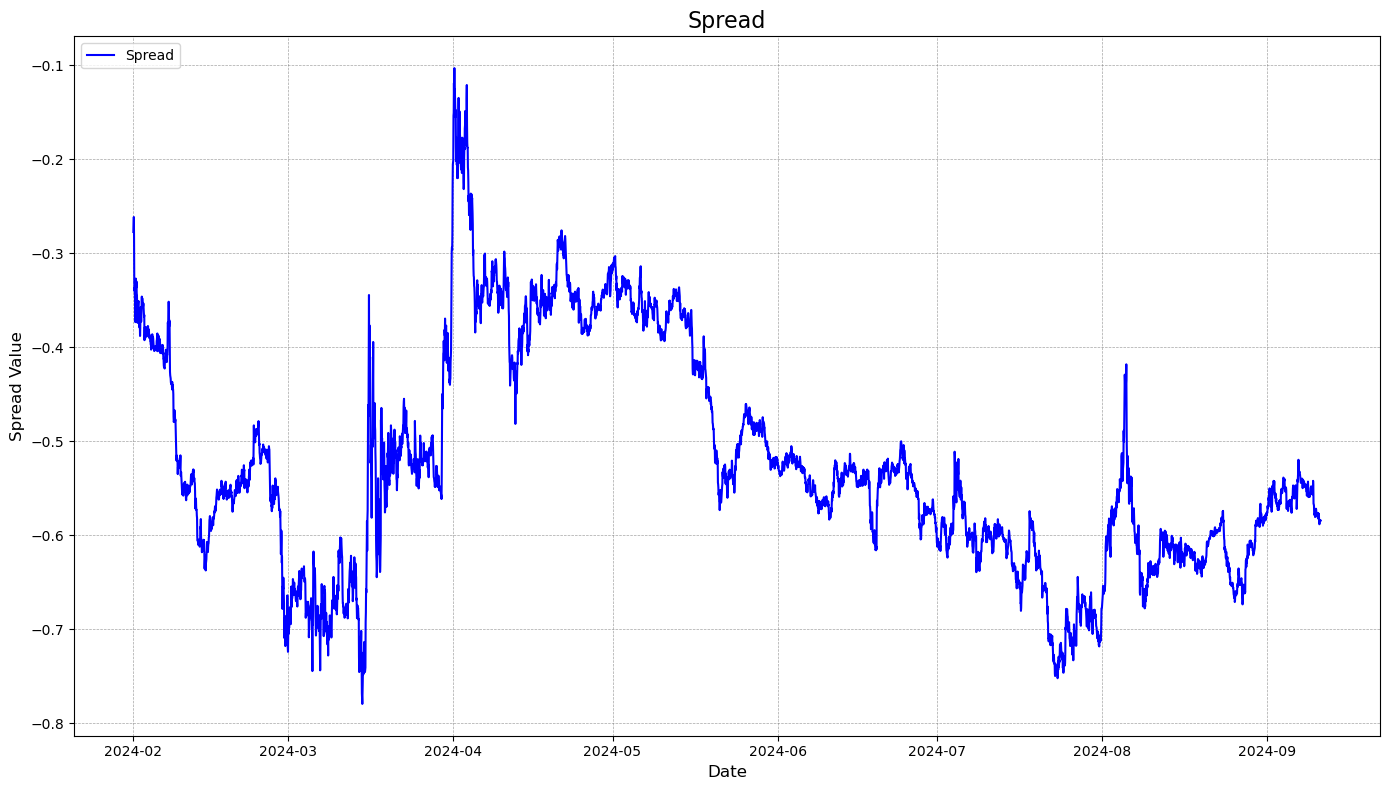

In [115]:
import matplotlib.pyplot as plt

# 绘制价差及其滚动均值和标准差
plt.figure(figsize=(14, 8))

# 绘制价差
plt.plot(df_mod.index, df_mod['spread'], label='Spread', color='blue', linewidth=1.5)




# 设置标题和标签
plt.title('Spread', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Spread Value', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 调整布局并显示图像
plt.tight_layout()
plt.show()


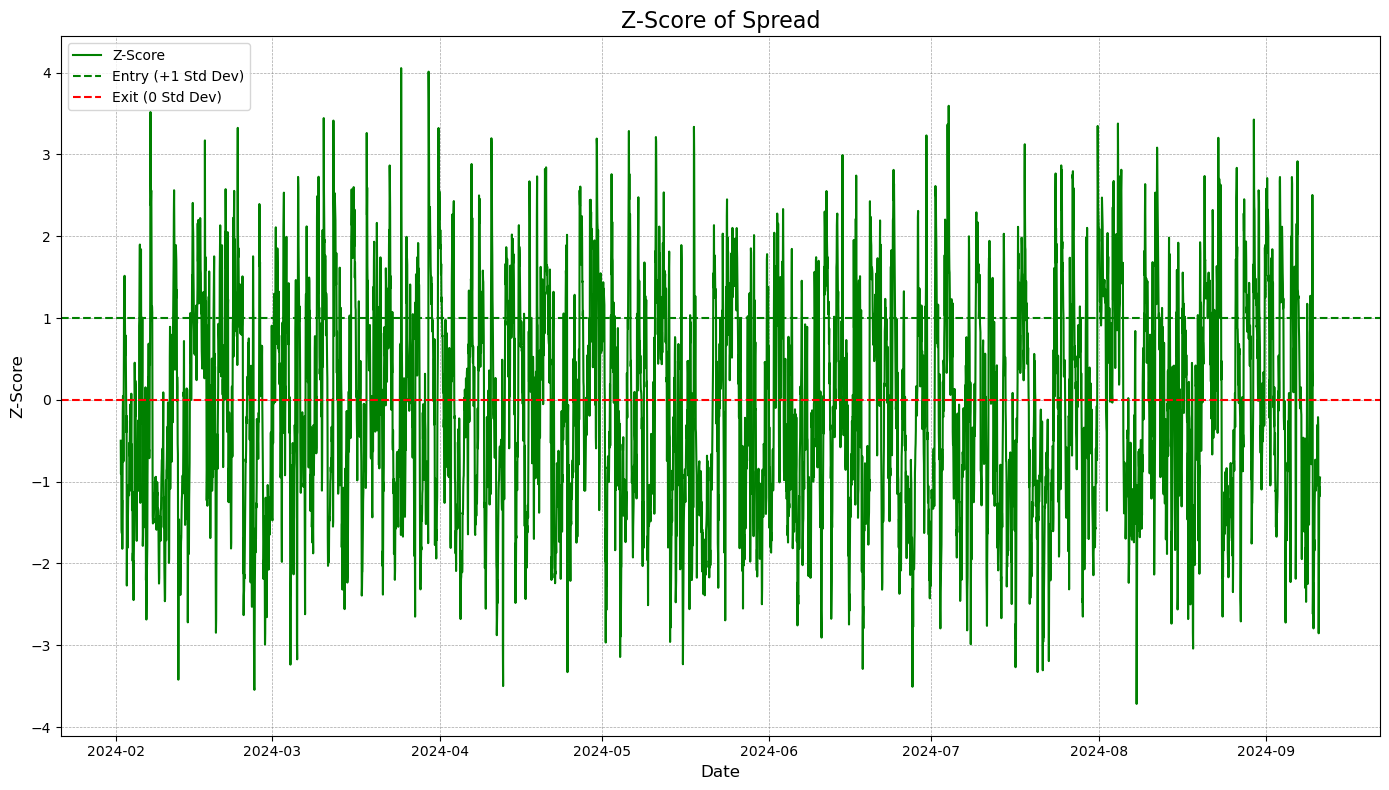

In [116]:
import matplotlib.pyplot as plt

# 绘制 Z-Score
plt.figure(figsize=(14, 8))

# 绘制 Z-Score
plt.plot(df_mod.index, df_mod['z'], label='Z-Score', color='green', linewidth=1.5)

# 绘制进入/退出的参考线
plt.axhline(1, color='green', linestyle='--', linewidth=1.5, label='Entry (+1 Std Dev)')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Exit (0 Std Dev)')

# 设置标题和标签
plt.title('Z-Score of Spread', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 调整布局并显示图像
plt.tight_layout()
plt.show()


In [117]:
# 初始化一个列表用于存储订单记录
orders = []

# 定义初始状态
position = 0  # 0 表示没有持仓，1 表示已持仓

# 遍历数据框，生成买入和卖出订单
for index, row in df_mod.iterrows():
    if row['z'] >= 1 and position == 0:  # Entry 条件：Z-score >= 1 且当前没有持仓
        orders.append({'Date': index, 'Action': 'Buy', 'Price': row['jup_close'], 'Z-Score': row['z']})
        position = 1  # 设置为已持仓
    elif row['z'] <= 0 and position == 1:  # Exit 条件：Z-score <= 0 且当前有持仓
        orders.append({'Date': index, 'Action': 'Sell', 'Price': row['jup_close'], 'Z-Score': row['z']})
        position = 0  # 设置为无持仓

# 将订单记录转换为数据框
orders = pd.DataFrame(orders)

# 查看生成的订单
print(orders)


                   Date Action   Price   Z-Score
0   2024-02-02 14:00:00    Buy  0.6214  1.491423
1   2024-02-03 00:00:00   Sell  0.6076 -0.394159
2   2024-02-05 11:00:00    Buy  0.5648  1.468348
3   2024-02-05 13:00:00   Sell  0.5573 -0.652135
4   2024-02-05 16:00:00    Buy  0.5452  1.042364
..                  ...    ...     ...       ...
325 2024-09-08 16:00:00   Sell  0.6946 -0.490956
326 2024-09-09 05:00:00    Buy  0.6977  1.272172
327 2024-09-09 07:00:00   Sell  0.7064 -0.124931
328 2024-09-09 14:00:00    Buy  0.6974  2.504724
329 2024-09-09 16:00:00   Sell  0.7262 -2.617693

[330 rows x 4 columns]


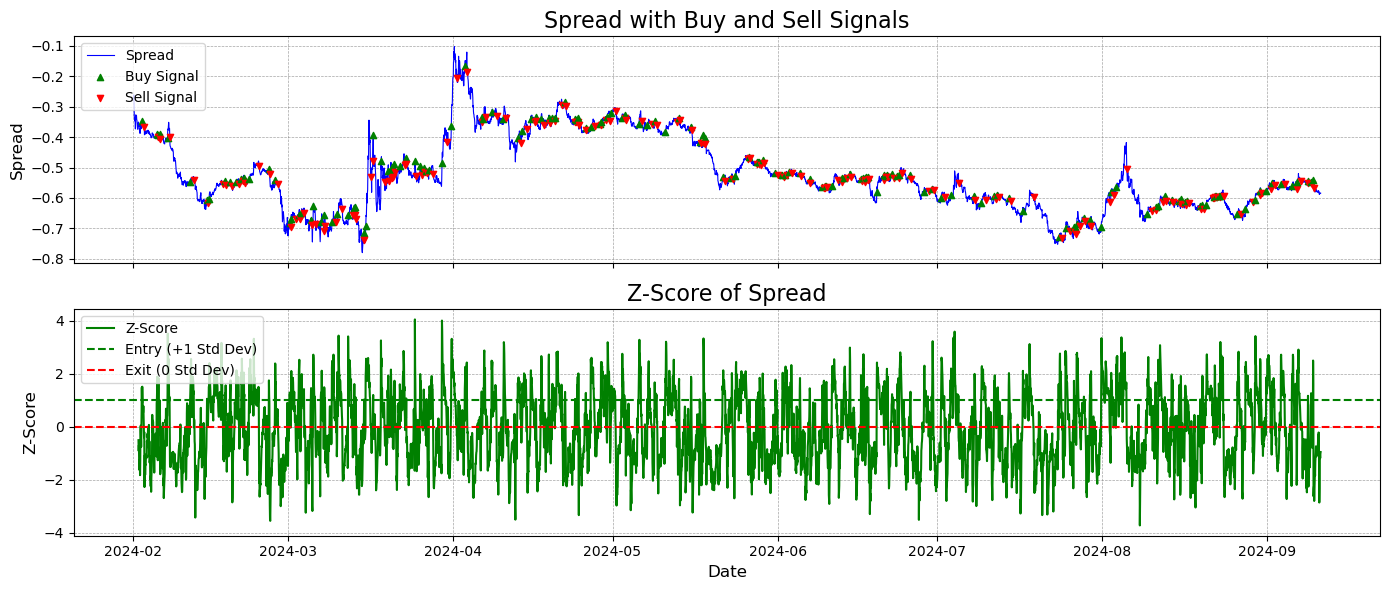

In [118]:
import matplotlib.pyplot as plt

# 确保订单中的 Date 列是 datetime 格式
orders['Date'] = pd.to_datetime(orders['Date'])

# 创建一个包含两个子图的图表
fig, ax = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# 第一个子图：绘制 spread 和买卖信号
ax[0].plot(df_mod.index, df_mod['spread'], label='Spread', color='blue', linewidth=0.8)

# 绘制买入和卖出信号
for _, order in orders.iterrows():
    if order['Action'] == 'Buy':
        # 获取该日期的 spread 值
        spread_value = df_mod.loc[order['Date'], 'spread'] if order['Date'] in df_mod.index else None
        if spread_value is not None:
            ax[0].scatter(order['Date'], spread_value, color='green', marker='^', label='Buy Signal', s=20, zorder=5)
    elif order['Action'] == 'Sell':
        # 获取该日期的 spread 值
        spread_value = df_mod.loc[order['Date'], 'spread'] if order['Date'] in df_mod.index else None
        if spread_value is not None:
            ax[0].scatter(order['Date'], spread_value, color='red', marker='v', label='Sell Signal', s=20, zorder=5)

# 添加标题和标签
ax[0].set_title('Spread with Buy and Sell Signals', fontsize=16)
ax[0].set_ylabel('Spread', fontsize=12)
ax[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 第二个子图：绘制 Z-Score 和参考线
ax[1].plot(df_mod.index, df_mod['z'], label='Z-Score', color='green', linewidth=1.5)

# 绘制 Z-Score 的参考线
ax[1].axhline(1, color='green', linestyle='--', linewidth=1.5, label='Entry (+1 Std Dev)')
ax[1].axhline(0, color='red', linestyle='--', linewidth=1.5, label='Exit (0 Std Dev)')

# 添加标题和标签
ax[1].set_title('Z-Score of Spread', fontsize=16)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylabel('Z-Score', fontsize=12)
ax[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# 避免重复的图例标签
handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=10)

handles, labels = ax[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[1].legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=10)

# 调整布局并显示图表
plt.tight_layout()
plt.show()


In [123]:
# Define z-score to normalize the spread


# Initialize signals
df_mod['Position'] = 0

# Generate signals for long and short positions
df_mod['Position'] = np.where(df_mod['z'] >= 1, 1, df_mod['Position'])  # z-score >= 1 时做多
df_mod['Position'] = np.where(df_mod['z'] <= -1, -1, df_mod['Position'])  # z-score <= -1 时做空
df_mod['Position'] = np.where((-1 < df_mod['z']) & (df_mod['z'] < 1), 0, df_mod['Position'])  # -1 < z-score < 1 时退出
print(df_mod)
print(df_mod.describe())
# Plot z-score and positions


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

timestamp
2024-02-01 00:00:00    0
2024-02-01 01:00:00    0
2024-02-01 02:00:00    0
2024-02-01 03:00:00    0
2024-02-01 04:00:00    0
                      ..
2024-09-10 20:00:00    0
2024-09-10 21:00:00    0
2024-09-10 22:00:00    0
2024-09-10 23:00:00    0
2024-09-11 00:00:00    0
Name: Position, Length: 5353, dtype: int64


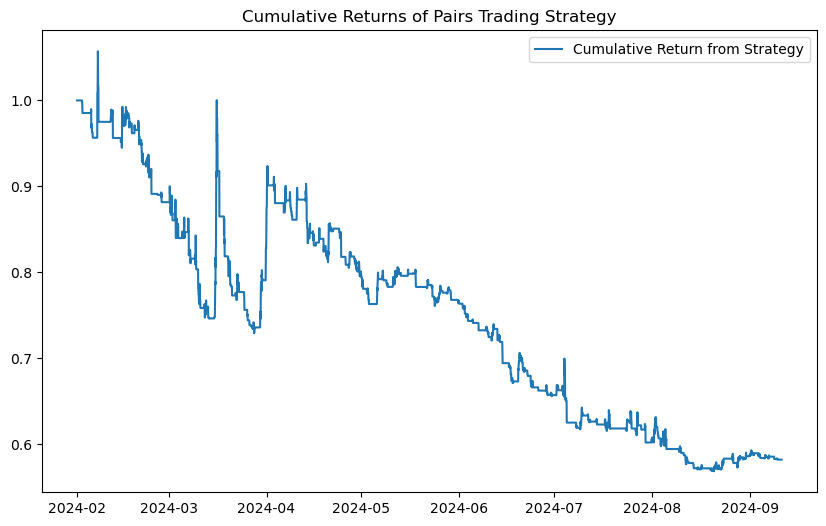

In [122]:

print(df_mod['Position'])
# Strategy returns: long spread means buying PEP and shorting KO
df_mod['Strategy_Return'] = df_mod['Position'].shift(1) * (df_mod['pct_change_jup'] - df_mod['pct_change_sol'])

# Cumulative returns
df_mod['Cumulative_Return'] = (1 + df_mod['Strategy_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(df_mod.index, df_mod['Cumulative_Return'], label='Cumulative Return from Strategy')
plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.legend()
plt.show()